# **Presenting myself and the goals of the project**

Welcome. My name is Victor and I'm here to create some insights about how the Adidas sales were from the year of 2020 to 2021.

I'll explore:

1.   How the regions of the United States of America differ on operating profit and volume of sales?

2.   Should a retailer be cut off and its investment reallocated on another retailer?

3.   Which class of product is the best seller on each region?

4.   Which city is the gold mine for Adidas?

5.  Which is the more efficient approach for sales?

# **Starting the fun!!**

Importing the most common libraries needed through the analysis.

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I will select only the variables that are of interest to answer the risen questions.

The variables that are being selected refers to:

`Retailer`: Retailer that made the sales

`Invoice Date`: Date that were recorded the sales information considering retailer

`Region`: Region of the USA where it's the city of the retailer

`City`: City at where the retailer is located

`Product`: Category of the products

`Units Sold`: Number of units solds of a category of product in a day by retailer

`Total Sales`: Number of sales of a category of product made in a day by retailer

`Operating Profit`: The profit obtained by each record in the data frame

`Operating Margin`: How much profit a retailer makes per dollar of sales

`Sales Method`: In which channel the products were sold (online, outlet or in-store)

Importing the data and observing how it is structured regards on columns names, index type, missing values, duplicated values.

In [276]:
adidas_df = pd.read_excel('/content/Adidas US Sales Datasets.xlsx',
                          usecols=['Retailer',
                                   'Invoice Date',
                                   'Region',
                                   'City',
                                   'Product',
                                   'Units Sold',
                                   'Total Sales',
                                   'Operating Profit',
                                   'Operating Margin',
                                   'Sales Method',])
adidas_df.head()

,Retailer,Invoice Date,Region,City,Product,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,Men's Street Footwear,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,Men's Athletic Footwear,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,Women's Street Footwear,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,Women's Athletic Footwear,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,Men's Apparel,900,540000.0,162000.0,0.30,In-store


Converting the name of each columns to lowercase and snakecase that it is the pattern followed in python.

In [277]:
adidas_df.columns = (adidas_df
                     .columns
                     .str.lower()
                     .str.replace(' ', '_'))
adidas_df.columns

Index(['retailer', 'invoice_date', 'region', 'city', 'product', 'units_sold',
       'total_sales', 'operating_profit', 'operating_margin', 'sales_method'],
      dtype='object')

Checking for missing values and at the same time assessing the data types of each variable.

In [278]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   invoice_date      9648 non-null   datetime64[ns]
 2   region            9648 non-null   object        
 3   city              9648 non-null   object        
 4   product           9648 non-null   object        
 5   units_sold        9648 non-null   int64         
 6   total_sales       9648 non-null   float64       
 7   operating_profit  9648 non-null   float64       
 8   operating_margin  9648 non-null   float64       
 9   sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 753.9+ KB


As we may see above, the number of entries for each variable is equal to the number of rows represented by the RangeIndex, therefore, there are no missing values in this data set.

When checked for duplicated values is returned to us that are none duplicated rows.

In [279]:
adidas_df.isna().sum()

retailer            0
invoice_date        0
region              0
city                0
product             0
units_sold          0
total_sales         0
operating_profit    0
operating_margin    0
sales_method        0
dtype: int64

In [280]:
adidas_df.duplicated().sum()

0

The columns `retailer`, `region`, `city`, `product` and `sales_method`are object-types. In order to optimize the data manipulation and as well create categorical variables, as they statistically already are, I'll convert them from objects to category type. As they all are nominal type, that is not ordered/ordinal, it's not necessary to define order between the values of each variable

In [281]:
object_variables = ['retailer','region','city','product','sales_method']
adidas_df[object_variables] = adidas_df[object_variables].astype('category')
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   category      
 1   invoice_date      9648 non-null   datetime64[ns]
 2   region            9648 non-null   category      
 3   city              9648 non-null   category      
 4   product           9648 non-null   category      
 5   units_sold        9648 non-null   int64         
 6   total_sales       9648 non-null   float64       
 7   operating_profit  9648 non-null   float64       
 8   operating_margin  9648 non-null   float64       
 9   sales_method      9648 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(3), int64(1)
memory usage: 427.3 KB


# **Going for the insights!!**

## How the regions of the United States of America differ on operating profit and volume of sales?

First things first, let's study the regions of the USA for the Adidas brand between the years of start of 2020 and end of 2021 and its impact on sales.

We can see that the West and Northeast regions are the most common throughout the data frame, composing around 25% of the observations each.

In [282]:
(adidas_df['region']
 .value_counts(normalize=True)
 .round(3))

West         0.254
Northeast    0.246
Midwest      0.194
South        0.179
Southeast    0.127
Name: region, dtype: float64

We may check then the region that solds the most units of all products.

In [283]:
region_units = (adidas_df
                .groupby('region',as_index=False)
                .agg({'units_sold':np.sum})
                .sort_values('units_sold', ascending=False)
                .reset_index(drop=True))

region_units

,region,units_sold
0,West,686985
1,Northeast,501279
2,South,492260
3,Southeast,407000
4,Midwest,391337


As expected West and Northeast figures on the top regions.

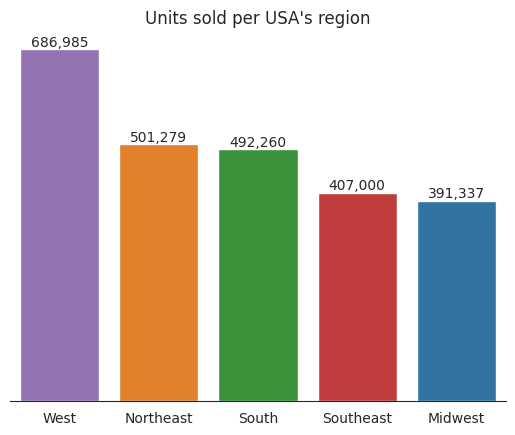

In [284]:
ax = sns.barplot(data=region_units,
                 x='region',
                 y='units_sold',
                 hue='region',
                 order=['West',
                        'Northeast',
                        'South',
                        'Southeast',
                        'Midwest'])

for i in range(len(region_units.index)):
    ax.bar_label(ax.containers[i], fontsize=10, fmt='{:,.0f}')

sns.color_palette('pastel')
sns.despine(left=True)
ax.set_yticks([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Units sold per USA\'s region')
plt.show()


Further, we can assess which region is the most regular in its sales.

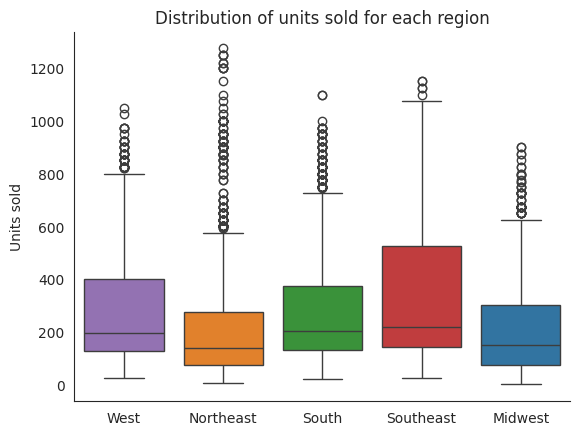

In [285]:
ax = sns.boxplot(adidas_df,
                 x='region',
                 y='units_sold',
                 hue='region',
                 order=['West',
                        'Northeast',
                        'South',
                        'Southeast',
                        'Midwest'])

sns.despine()
ax.set_title('Distribution of units sold for each region')
ax.set_ylabel('Units sold')
ax.set_xlabel(None)
plt.show()

In [286]:
region_stats = adidas_df.groupby('region')[['units_sold']].describe().T
region_stats

region                Midwest    Northeast        South    Southeast  \
units_sold count  1872.000000  2376.000000  1728.000000  1224.000000   
           mean    209.047543   210.976010   284.872685   332.516340   
           std     173.974630   203.637531   216.864248   261.424311   
           min       0.000000     7.000000    19.000000    26.000000   
           25%      75.000000    75.000000   131.000000   143.750000   
           50%     150.000000   140.000000   203.000000   217.000000   
           75%     300.000000   275.000000   375.000000   525.000000   
           max     900.000000  1275.000000  1100.000000  1150.000000   

region                   West  
units_sold count  2448.000000  
           mean    280.631127  
           std     206.045948  
           min      26.000000  
           25%     128.000000  
           50%     196.000000  
           75%     400.000000  
           max    1050.000000

In [287]:
adidas_df.groupby('region')['units_sold'].std().sort_values(ascending=False)

region
Southeast    261.424311
South        216.864248
West         206.045948
Northeast    203.637531
Midwest      173.974630
Name: units_sold, dtype: float64

In [288]:
from scipy.stats import iqr
def spread_measure(var):
    return iqr(var)

adidas_df.groupby('region')['units_sold'].apply(spread_measure).sort_values(ascending=False)

region
Southeast    381.25
West         272.00
South        244.00
Midwest      225.00
Northeast    200.00
Name: units_sold, dtype: float64

The USA's region **that sells the most units** of products is the **West region** and the **worst seller**, **Midwest**.

Assessing despite regularity of sales, **Midwest stands out as the most regular** having the **lowest standard deviation and IQR**. The region that presented the **most irregularity** was the **Southeast** with the **greatest standard deviation and IQR.** Although, be regular is not always good, once a region may be a bad seller always, for example.

Yet, volume of sales doesn't shows that the West region is the more profitable e.g. once it can sells most low-profit products that generates lower profits. Always good to reinforce: **"correlation determines no causation"**

Assessing now the profit generated by region.

In [289]:
region_profit = (adidas_df
                 .groupby('region', as_index=False)
                 .agg({'operating_profit':np.sum})
                 .sort_values('operating_profit', ascending=False)
                 .reset_index(drop=True))
region_profit

,region,operating_profit
0,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.70
4,Midwest,52811346.48


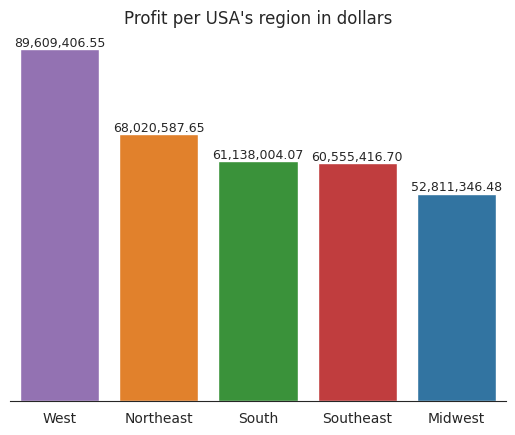

In [290]:
ax = sns.barplot(data=region_profit,
                 x='region',
                 y='operating_profit',
                 hue='region',
                 order=['West',
                        'Northeast',
                        'South',
                        'Southeast',
                        'Midwest'])

for i in range(len(region_profit)):
    ax.bar_label(ax.containers[i], fontsize=9, fmt='{:,.2f}')

sns.despine(left=True)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticks([])
ax.set_title('Profit per USA\'s region in dollars')
plt.show()

Compairing the yield among the dates given by the data set, one can infer about which region delivers the profit in the most regular way.

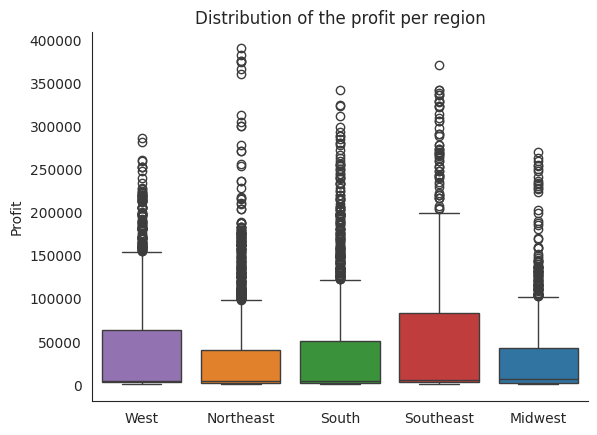

In [291]:
ax = sns.boxplot(adidas_df,
                 x='region',
                 y='operating_profit',
                 hue='region',
                 order=['West',
                        'Northeast',
                        'South',
                        'Southeast',
                        'Midwest'])

sns.despine()
ax.set_ylabel('Profit')
ax.set_xlabel(None)
ax.set_title('Distribution of the profit per region')
plt.show()

In [292]:
op_profit_df = adidas_df.groupby('region')[['operating_profit']].describe().T
op_profit_df

region                        Midwest      Northeast          South  \
operating_profit count    1872.000000    2376.000000    1728.000000   
                 mean    28211.189359   28628.193455   35380.789392   
                 std     40253.139912   48551.335194   59520.152739   
                 min         0.000000      75.200000     217.580000   
                 25%      1498.420000    1401.047500    2020.865000   
                 50%      6012.520000    3680.000000    4031.000000   
                 75%     42000.000000   39859.375000   50156.250000   
                 max    270000.000000  390000.000000  341250.000000   

region                      Southeast           West  
operating_profit count    1224.000000    2448.000000  
                 mean    49473.379657   36605.149734  
                 std     71817.845047   52845.142286  
                 min       339.300000     308.700000  
                 25%      2795.545000    2342.495000  
                 50%      5753.520000    4254.960000  
                 75%     82937.500000   63000.000000  
                 max    371250.000000  286000.000000

In [293]:
adidas_df.groupby('region')['operating_profit'].std().sort_values(ascending=False)

region
Southeast    71817.845047
South        59520.152739
West         52845.142286
Northeast    48551.335194
Midwest      40253.139912
Name: operating_profit, dtype: float64

In [294]:
from scipy.stats import iqr
def spread_measure(var):
    return iqr(var)

adidas_df.groupby('region')['operating_profit'].apply(spread_measure).sort_values(ascending=False)

region
Southeast    80141.9550
West         60657.5050
South        48135.3850
Midwest      40501.5800
Northeast    38458.3275
Name: operating_profit, dtype: float64

Evaluating if the outliers are caused by some special date as christmas, thanksgiving day, black friday or even 4th of july.

In [295]:
from scipy.stats import iqr
holidays = ['2020-07-04',
            '2021-07-04',
            '2020-12-25',
            '2021-12-25',
            '2020-11-26',
            '2021-11-25',
            '2020-11-27',
            '2021-12-25']

inferior_whis = adidas_df['operating_profit'].quantile(0.25) - 1.5 * iqr(adidas_df['operating_profit'])
superior_whis = adidas_df['operating_profit'].quantile(0.75) + 1.5 * iqr(adidas_df['operating_profit'])

outliers = adidas_df[(adidas_df['operating_profit'] < inferior_whis) | (adidas_df['operating_profit'] > superior_whis)]
outliers[outliers['invoice_date'].isin([holidays])]

,retailer,invoice_date,region,city,product,units_sold,total_sales,operating_profit,operating_margin,sales_method


Seeing if there is a correlation between the month in which the sale had been made, the operating margin and the operating profit

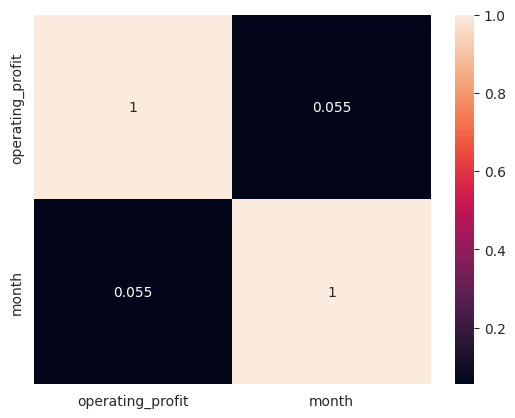

In [296]:
adidas_df['month'] = adidas_df['invoice_date'].dt.month

corr = adidas_df[['operating_profit','month']].corr()
sns.heatmap(corr, annot=True)
plt.show()

Once the correlation between `operating_profit` and `month` are close to zero we can infer that there is almost zero correlation between them. Thus, this special dates, on the given data, doesn't cause an abnormal consumption of adidas produts.

### **Conclusion**

*   The region that presented the most regularity was Midwest having both, standard deviation and IQR, the smaller between all evaluated. In contrast, Southeast leads again as the most irregular.

*   As shown above, the profit obtained between the start of 2020 and end of 2021 by Adidas had the West as its most profitable region, and the Midwest as its worst.

*   Despite the Southeast solds, in units, lower quantities than the South, we may observe that the profit is almost the same, having less discrepancy if compared on regards the difference of quantities of product solds between the two regions. Thus, allowing to create a hypothesis that the Southeast sells more high-profit products than the South region, whose main products are low-profit.

*   Special dates didn't impact on the Adidas' profit from 2020 to 2021

Checking if there is evidence of linear correlation between `operating_profit` and `units_sold`:

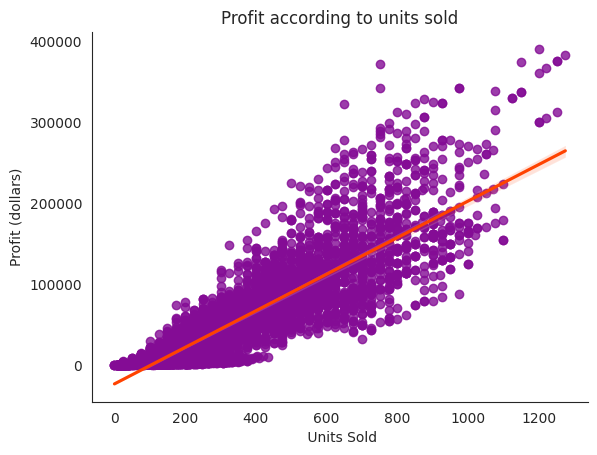

In [297]:
sns.regplot(data=adidas_df,
            x='units_sold',
            y='operating_profit',
            color='#840c95',
            ci=100,
            line_kws=dict(color='#ff4200'))

sns.despine()
plt.title('Profit according to units sold')
plt.xlabel(' Units Sold')
plt.ylabel('Profit (dollars)')
plt.show()

Once there is apparently a linear correlation with low margin of error, that due to the use of confidence interval (ci) at the maximum, between the `units_sold` and `operating_profit` we can measure using the Pearson coefficient. It results on a high positive correlation value (0.89).

In [298]:
adidas_df[['units_sold','operating_profit']].corr()

,units_sold,operating_profit
units_sold,1.000000,0.892379
operating_profit,0.892379,1.000000


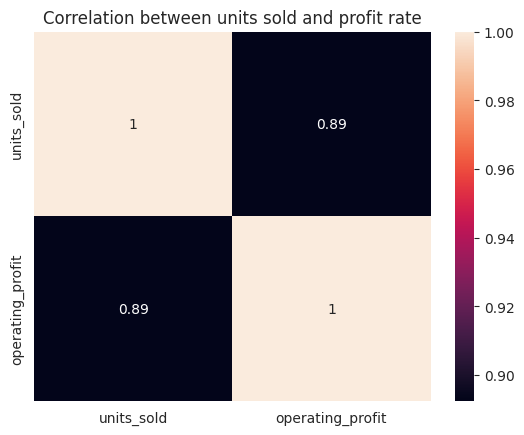

In [299]:
sns.heatmap(adidas_df[['units_sold','operating_profit']].corr(),
            annot=True)

plt.title('Correlation between units sold and profit rate')
plt.show()

**For this particular case, we may infer that there is a positive correlation between the `operating_profit` and `units_sold` variables but we can't say that one causes the other.**

## Should a retailer be cut off and its investment reallocated on another retailer?

For start let's subset the `adidas_df` and group it by `retailers` brands.

In [300]:
retailer_invest = (adidas_df
                   .groupby('retailer', as_index=False)
                   .agg({'operating_margin':np.mean})
                   .sort_values('operating_margin', ascending=False)
                   .reset_index(drop=True))
retailer_invest

,retailer,operating_margin
0,Sports Direct,0.444892
1,Kohl's,0.419291
2,Foot Locker,0.417933
3,Amazon,0.417871
4,West Gear,0.417856
5,Walmart,0.406534


Next, we plot a bar plot with the intent to make clearer the comparison between all of the retailers considering the `operating_margin`.

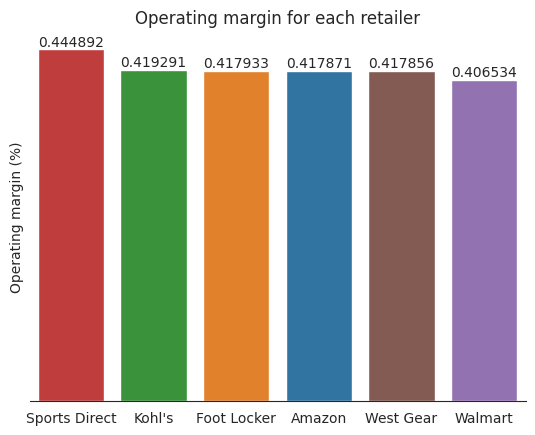

In [301]:
ax = sns.barplot(data=retailer_invest,
                 x='retailer',
                 y='operating_margin',
                 hue='retailer',
                 order=['Sports Direct',
                        'Kohl\'s',
                        'Foot Locker',
                        'Amazon',
                        'West Gear',
                        'Walmart'])

for i in range(len(retailer_invest)):
    ax.bar_label(ax.containers[i], fontsize=10)

sns.despine(left=True)
ax.set_yticks([])
ax.set_ylabel('Operating margin (%)')
ax.set_xlabel(None)
ax.set_title('Operating margin for each retailer')
plt.show()

Sports Direct is clear the best-seller retailer. Yet, the others all remain with little differences, in order to select if a retail should be cut off, a descriptive statistics is a reliable tool to start analyzing it.

Assessing for the distribution of the sales for each retailer with the intent to see which brand is the most regular once it turns the investment safer.

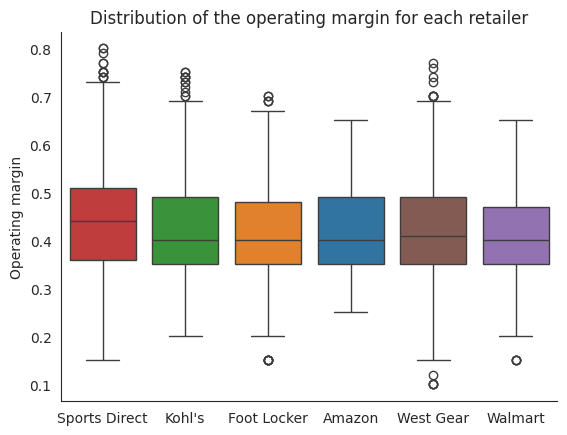

In [302]:
ax = sns.boxplot(adidas_df,
                 x='retailer',
                 y='operating_margin',
                 hue='retailer',
                 order=['Sports Direct',
                        'Kohl\'s',
                        'Foot Locker',
                        'Amazon',
                        'West Gear',
                        'Walmart'])

sns.despine()
ax.set_xlabel(None)
ax.set_ylabel('Operating margin')
ax.set_title('Distribution of the operating margin for each retailer')
plt.show()

Looking for the descriptive statistics of each retailer operating profit we get:

In [303]:
descriptive_stats = (adidas_df
                     .groupby('retailer')[['operating_profit']]
                     .describe())

descriptive_stats

operating_profit                                                 \
                         count          mean           std     min        25%   
retailer                                                                        
Amazon                   949.0  30367.232150  44192.495075  166.40  1661.9200   
Foot Locker             2637.0  30611.348051  51194.484899    0.00  1504.8000   
Kohl's                  1030.0  35739.080175  48292.449414  249.60  2445.9750   
Sports Direct           2032.0  36581.178622  58018.483181  227.04  2058.9600   
Walmart                  626.0  41185.387556  65699.002068  403.20  2620.7400   
West Gear               2374.0  36085.877498  56359.734717   93.38  2011.0825   

                                            
                    50%      75%       max  
retailer                                    
Amazon         3931.200  47250.0  290625.0  
Foot Locker    4314.940  40500.0  382500.0  
Kohl's         4166.240  67875.0  236250.0  
Sports Direct  4145.040  57750.0  341250.0  
Walmart        4822.580  64000.0  390000.0  
West Gear      4607.945  54000.0  341250.0

In [304]:
adidas_df.groupby('retailer')['operating_profit'].std().sort_values(ascending=False)

retailer
Walmart          65699.002068
Sports Direct    58018.483181
West Gear        56359.734717
Foot Locker      51194.484899
Kohl's           48292.449414
Amazon           44192.495075
Name: operating_profit, dtype: float64

In [305]:
from scipy.stats import iqr
def spread_measure(var):
    return iqr(var)

adidas_df.groupby('retailer')['operating_profit'].apply(spread_measure).sort_values(ascending=False)

retailer
Kohl's           65429.0250
Walmart          61379.2600
Sports Direct    55691.0400
West Gear        51988.9175
Amazon           45588.0800
Foot Locker      38995.2000
Name: operating_profit, dtype: float64

The Walmart has the biggest standard deviation and the second biggest IQR being the more unstable retailer on regards the operating profit.

One can think of what may cause these outliers observed in the operating margin boxplot. Evaluating on regards the holidays and special dates (christmas, black friday, thanksgiving day, 4th of july) date we get:

In [306]:
from scipy.stats import iqr
holidays = ['2020-07-04',
            '2021-07-04',
            '2020-12-25',
            '2021-12-25',
            '2020-11-26',
            '2021-11-25',
            '2020-11-27',
            '2021-12-25']

inferior_whis = adidas_df['operating_margin'].quantile(0.25) - 1.5 * iqr(adidas_df['operating_margin'])
superior_whis = adidas_df['operating_margin'].quantile(0.75) + 1.5 * iqr(adidas_df['operating_margin'])

outliers = adidas_df[(adidas_df['operating_margin'] < inferior_whis) | (adidas_df['operating_margin'] > superior_whis)]
outliers[outliers['invoice_date'].isin([holidays])]

,retailer,invoice_date,region,city,product,units_sold,total_sales,operating_profit,operating_margin,sales_method,month


Seeing if there is a correlation between the month in which the sale had been made, the operating margin and the operating profit

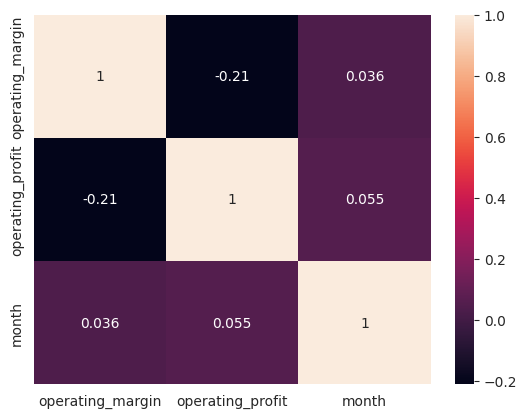

In [307]:
corr = adidas_df[['operating_margin','operating_profit','month']].corr()
sns.heatmap(corr, annot=True)
plt.show()

Once none outliers are correlated to special dates and the correlation between month and the operating profit and margin are close to zero, we can infer that those were caused by an alternative event. By contrast, `operating_margin` and `operating_profit` shows a slight negative correlation.

Evaluating the behavior through the days of the month for each retailer in order to see if one impacts in order sales.

### **Conclusion**

*   The Walmart has the biggest standard deviation an the second biggest IQR. Considering all that, with only the given data, this may be the channel of sales whose investment could be reallocated to Sports Direct in order to increase the profit of the company.

*   Special dates didn't impact on the Adidas' operating profit from 2020 to 2021.

## Which class of products is the best-seller on each region?

With the intent to have a better visualization on the products, regions and units sold all together, a pivot table is made summing the values of `units_sold` per `region` and `product` types.

In [308]:
prod_and_reg = (adidas_df
                .pivot_table(index='product',
                             columns='region',
                             values='units_sold',
                             aggfunc=np.sum))

prod_and_reg

region,Midwest,Northeast,South,Southeast,West
product,,,,,
Men's Apparel,45304,62031,60641,54385,84322
Men's Athletic Footwear,65120,81474,90079,71129,127724
Men's Street Footwear,109861,134252,106545,91867,150795
Women's Apparel,69435,90048,88740,68839,116765
Women's Athletic Footwear,44808,59464,63998,55292,93674
Women's Street Footwear,56809,74010,82257,65488,113705


Plotting a bar plot making it more intuitive and clear.

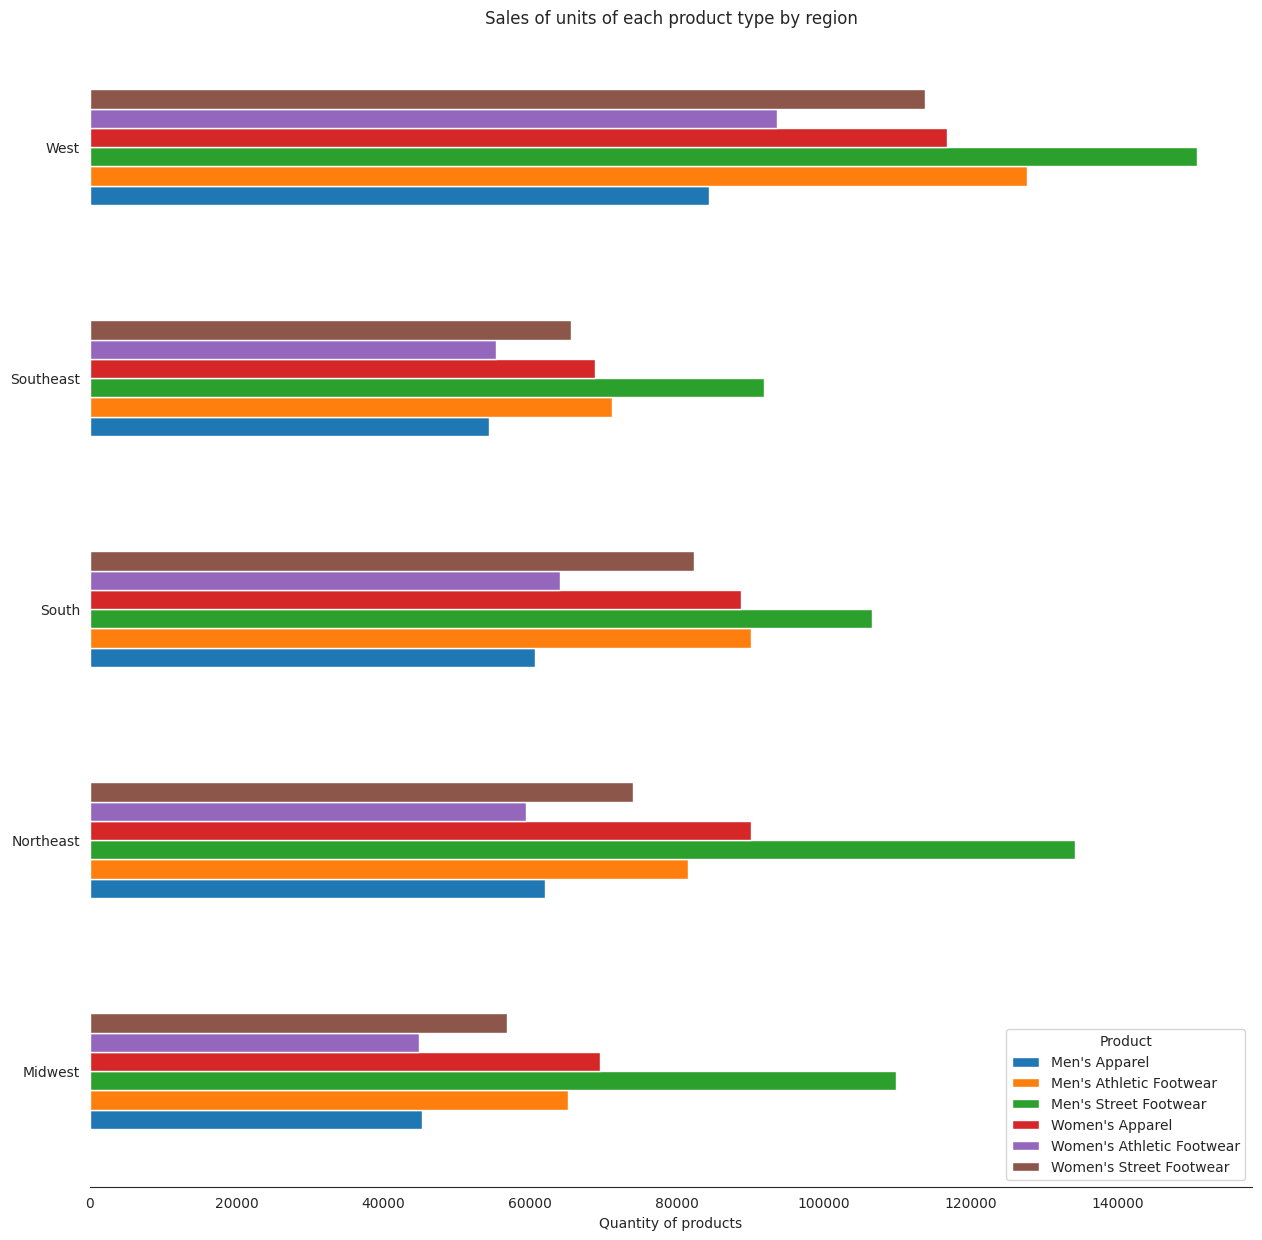

In [309]:
prod_and_reg.T.plot(kind='barh',legend=True, figsize=(15,15))

sns.despine(left=True)
sns.set_style('white')
plt.legend(title='Product',fontsize=10,loc='best')
plt.xlabel('Quantity of products')
plt.ylabel(None)
plt.xticks(rotation=0)
plt.title('Sales of units of each product type by region')
plt.show()

Obtaining the best seller products types for each region:

In [310]:
print('The best-sellers types of products by Adidas per region are:')
for region in prod_and_reg.columns:
    product = prod_and_reg.loc[:,region].idxmax()
    print(f'{region}: {product}')

The best-sellers types of products by Adidas per region are:
Midwest: Men's Street Footwear
Northeast: Men's Street Footwear
South: Men's Street Footwear
Southeast: Men's Street Footwear
West: Men's Street Footwear


### **Conclusion**

One can conclude then that the products from Adidas that are the best-sellers in USA's regions, given by the data set, are from the category Men's Street Footwear

## Which city is the gold mine for Adidas?

In order to determine the cities that provides more profit the following process was done

In [311]:
city_df = (adidas_df
           .groupby('city', as_index=False)
           .agg({'units_sold':np.sum,
                 'total_sales':np.sum,
                 'operating_profit':np.sum,
                 'operating_margin':np.mean})
           .sort_values(['operating_margin'], ascending=False)
           .reset_index(drop=True))

city_df.head(3)

,city,units_sold,total_sales,operating_profit,operating_margin
0,Birmingham,63327,17633424.0,9147581.39,0.553565
1,Knoxville,66077,18067440.0,8493660.06,0.506574
2,Detroit,50095,18625433.0,8135894.02,0.475764


### **Conclusion**

Thus, despite having less `total_sales` and `units_sold` than the second and third, Birmingham have the best `operating_margin` being the best city for sales

## Which is the more efficient approach for sales?

To choose the more efficient approach will be taken into account the variables `sales_method` ,`operating_margin` and `total_sales` once these consider the volume of sales and the profit rate and the manner that the sale was closed.

In [312]:
(adidas_df
 .groupby('sales_method')
 .agg({'operating_margin':np.mean,
       'total_sales':np.sum})
 .sort_values('operating_margin',ascending=False))

,operating_margin,total_sales
sales_method,,
Online,0.464152,247672882.0
Outlet,0.394876,295585493.0
In-store,0.356121,356643750.0


Let's evaluate how the operating margin was affected over the years covered on the dataset

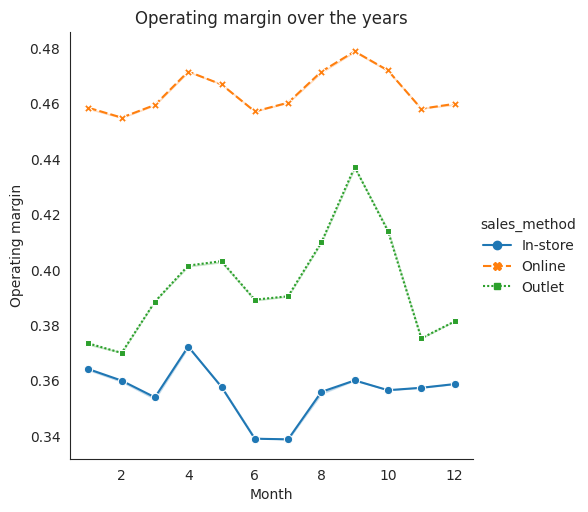

In [313]:
ax = sns.relplot(data=adidas_df,
                 x='month',
                 y='operating_margin',
                 hue='sales_method',
                 kind='line',
                 markers=True,
                 style='sales_method',
                 errorbar=('ci',0.95))

plt.title('Operating margin over the years')
ax.set_ylabels('Operating margin')
ax.set_xlabels('Month')
plt.show()

### **Conclusion**

We can observe that in the range of two years the sales made online presented a decrease while on outlets and in-store, an increase. Yet, at the moment of this data collection, online remains as the most profitable channel of sales, having the highest operating margin.